In [1]:
%matplotlib inline
%matplotlib widget
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt

from lsst_efd_client import EfdClient

In [2]:
efd_client = EfdClient("summit_efd")

## Time from Russell in Slack Channel

Timestamp (TAI unix seconds): 1669244241.788

In [5]:
time = Time(1669244241.788, format='unix_tai', scale='tai')
time.format = 'fits'
print(time)

2022-11-23T22:57:21.788


Based on the above, use the following time period.

In [68]:
# Short time period 
#time_start = Time("2022-11-23T23:10:30", scale="utc", format="isot")
#time_end = Time("2022-11-23T23:11:00", scale="utc", format="isot")

# Long time period
time_start = Time("2022-11-23T23:04:00", scale="utc", format="isot")
time_end = Time("2022-11-23T23:11:00", scale="utc", format="isot")

In [70]:
# EFD data
data_elevation = await efd_client.select_time_series(
        "lsst.sal.MTMount.elevation",
        fields=["timestamp", "actualPosition", "actualVelocity", "demandPosition", "demandVelocity"],
        start=time_start,
        end=time_end)

data_azimuth = await efd_client.select_time_series(
        "lsst.sal.MTMount.azimuth",
        fields=["timestamp", "actualPosition", "actualVelocity", "demandPosition", "demandVelocity"],
        start=time_start,
        end=time_end)

# Time period
timestamp_data = data_elevation.timestamp - data_elevation.timestamp[0]

Draw the demanded position in the following.
Do not care about the weird points at this moment.

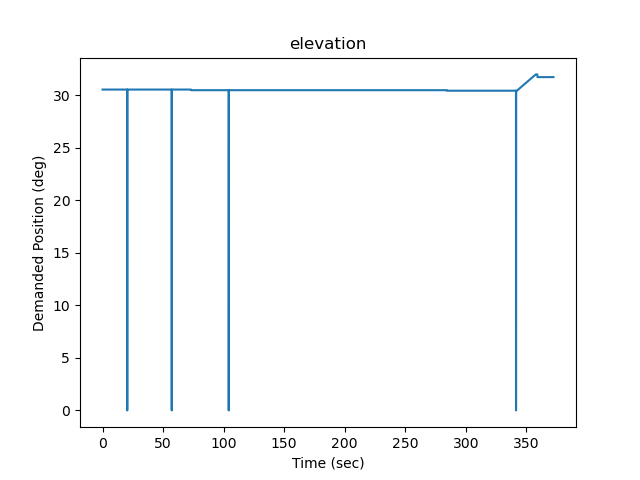

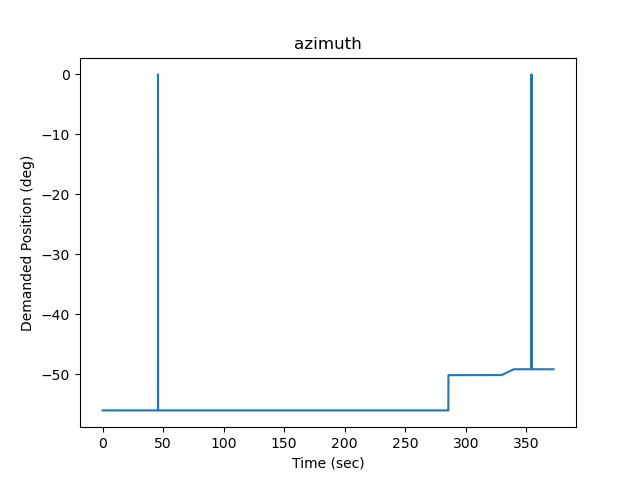

In [72]:
titles = ["elevation", "azimuth"]
demand_positions = [data_elevation.demandPosition, data_azimuth.demandPosition]

for demand_position, title in zip(demand_positions, titles):
    plt.figure()
    plt.plot(timestamp_data, demand_position)
    plt.title(title)
    plt.xlabel("Time (sec)")
    plt.ylabel("Demanded Position (deg)")
    plt.show()

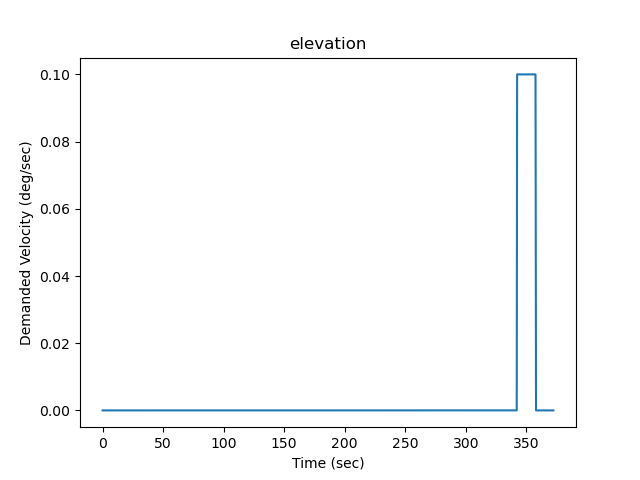

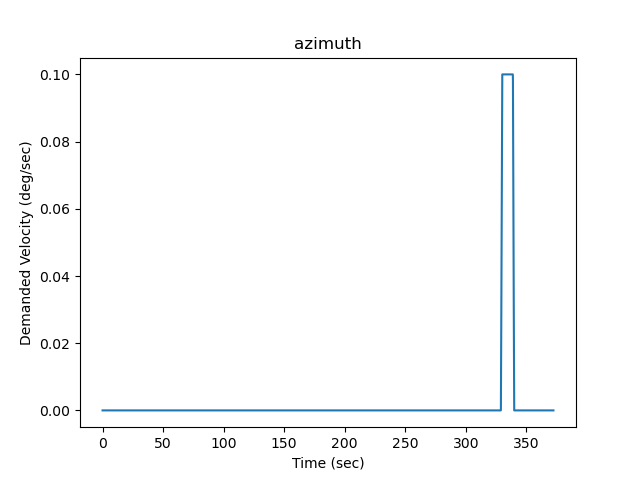

In [73]:
demand_velocities = [data_elevation.demandVelocity, data_azimuth.demandVelocity]

for demand_velocity, title in zip(demand_velocities, titles):
    plt.figure()
    plt.plot(timestamp_data, demand_velocity)
    plt.title(title)
    plt.xlabel("Time (sec)")
    plt.ylabel("Demanded Velocity (deg/sec)")
    plt.show()

It looks like the trajectory generator performs well if the tracking velocity is 0.1 deg/sec.
This is expected.

However, I thought that they should be 0.05 deg/sec and 0.025 deg/sec based on slack messages.